# Popular 10000 movies listed on TMDb

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [2]:
cast_df = pd.read_csv('../data/popular_10000_movies/cast_dataset.csv', index_col='id')
crew_df = pd.read_csv('../data/popular_10000_movies/crew_dataset.csv', index_col='id')
keywords_df = pd.read_csv('../data/popular_10000_movies/keywords_dataframe.csv', index_col='id')
mov_df = pd.read_csv('../data/popular_10000_movies/movies_dataset.csv', index_col='id')

keywords_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
movies_df = mov_df.merge(cast_df, on='id').merge(crew_df, on ='id').merge(keywords_df, on ='id')
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

In [4]:
movies_df.head()

,genre_ids,original_language,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
id,,,,,,,,,,,,
385687,"[28, 80, 53]",en,Over many missions and against impossible odds...,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
697843,"[28, 53]",en,Tasked with extracting a family who is at the ...,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
603692,"[28, 53, 80]",en,"With the price on his head ever increasing, Jo...",1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
569094,"[28, 12, 16, 878]",en,"After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
502356,"[16, 10751, 12, 14, 35]",en,"While working underground to fix a water main,...",1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."


In [5]:
movies_df['original_language'].value_counts()

en    10652
Name: original_language, dtype: int64

In [6]:
movies_df.drop('original_language', axis=1, inplace=True)

In [7]:
tmdb_df = pd.read_csv('../data/popular_10000_movies/full_data.csv')
tmdb_df.head()

,id,genre_ids,original_language,overview,popularity,release_date,title,vote_average,vote_count,genres,cast,crew,keywords
0,385687,"[28, 80, 53]",en,Over many missions and against impossible odds...,4654.279,2023-05-17,Fast X,7.3,2093,"Action, Crime, Thriller","[{'cast_id': 12835, 'name': 'Vin Diesel', 'cha...","[{'crew_id': 1302, 'name': 'Susie Figgis', 'de...","[{'id': 9663, 'name': 'sequel'}, {'id': 9748, ..."
1,697843,"[28, 53]",en,Tasked with extracting a family who is at the ...,2494.010,2023-06-09,Extraction 2,7.7,910,"Action, Thriller","[{'cast_id': 74568, 'name': 'Chris Hemsworth',...","[{'crew_id': 950, 'name': 'Pietro Scalia', 'de...","[{'id': 3070, 'name': 'mercenary'}, {'id': 966..."
2,603692,"[28, 53, 80]",en,"With the price on his head ever increasing, Jo...",1920.127,2023-03-22,John Wick: Chapter 4,7.9,3344,"Action, Thriller, Crime","[{'cast_id': 6384, 'name': 'Keanu Reeves', 'ch...","[{'crew_id': 3615, 'name': 'Manfred Banach', '...","[{'id': 242, 'name': 'new york city'}, {'id': ..."
3,569094,"[28, 12, 16, 878]",en,"After reuniting with Gwen Stacy, Brooklyn’s fu...",2013.795,2023-05-31,Spider-Man: Across the Spider-Verse,8.6,1796,"Action, Adventure, Animation, Science Fiction","[{'cast_id': 587506, 'name': 'Shameik Moore', ...","[{'crew_id': 7624, 'name': 'Stan Lee', 'depart...","[{'id': 2858, 'name': 'sacrifice'}, {'id': 328..."
4,502356,"[16, 10751, 12, 14, 35]",en,"While working underground to fix a water main,...",1539.037,2023-04-05,The Super Mario Bros. Movie,7.8,5165,"Animation, Family, Adventure, Fantasy, Comedy","[{'cast_id': 73457, 'name': 'Chris Pratt', 'ch...","[{'crew_id': 70851, 'name': 'Jack Black', 'dep...","[{'id': 282, 'name': 'video game'}, {'id': 690..."


In [8]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10652 non-null  int64  
 1   genre_ids          10652 non-null  object 
 2   original_language  10652 non-null  object 
 3   overview           10649 non-null  object 
 4   popularity         10652 non-null  float64
 5   release_date       10636 non-null  object 
 6   title              10652 non-null  object 
 7   vote_average       10652 non-null  float64
 8   vote_count         10652 non-null  int64  
 9   genres             10634 non-null  object 
 10  cast               10652 non-null  object 
 11  crew               10652 non-null  object 
 12  keywords           10652 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 707.4+ KB


In [9]:
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 10652 non-null  int64         
 1   genre_ids          10652 non-null  object        
 2   original_language  10652 non-null  object        
 3   overview           10649 non-null  object        
 4   popularity         10652 non-null  float64       
 5   release_date       10636 non-null  datetime64[ns]
 6   title              10652 non-null  object        
 7   vote_average       10652 non-null  float64       
 8   vote_count         10652 non-null  int64         
 9   genres             10634 non-null  object        
 10  cast               10652 non-null  object        
 11  crew               10652 non-null  object        
 12  keywords           10652 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory 

In [26]:
release_n_popularity = tmdb_df[['release_date', 'popularity']]
# release_n_popularity.set_index('release_date', inplace=True)
# release_n_popularity = release_n_popularity.sort_index()

In [27]:
release_n_popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  10636 non-null  datetime64[ns]
 1   popularity    10652 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 166.5 KB


In [28]:
release_n_popularity

,release_date,popularity
0,2023-05-17,4654.279
1,2023-06-09,2494.010
2,2023-03-22,1920.127
3,2023-05-31,2013.795
4,2023-04-05,1539.037
...,...,...
10647,2007-12-21,11.077
10648,1990-03-22,11.076
10649,2003-04-16,11.075
10650,2017-12-23,11.074


In [29]:
release_n_popularity = release_n_popularity.dropna()
release_n_popularity

,release_date,popularity
0,2023-05-17,4654.279
1,2023-06-09,2494.010
2,2023-03-22,1920.127
3,2023-05-31,2013.795
4,2023-04-05,1539.037
...,...,...
10647,2007-12-21,11.077
10648,1990-03-22,11.076
10649,2003-04-16,11.075
10650,2017-12-23,11.074


In [33]:
release_n_popularity.describe()

,popularity
count,10636.000000
mean,26.587947
std,73.321070
min,7.007000
25%,13.157000
50%,16.449000
75%,23.886750
max,4654.279000


Text(0, 0.5, 'Popularity')

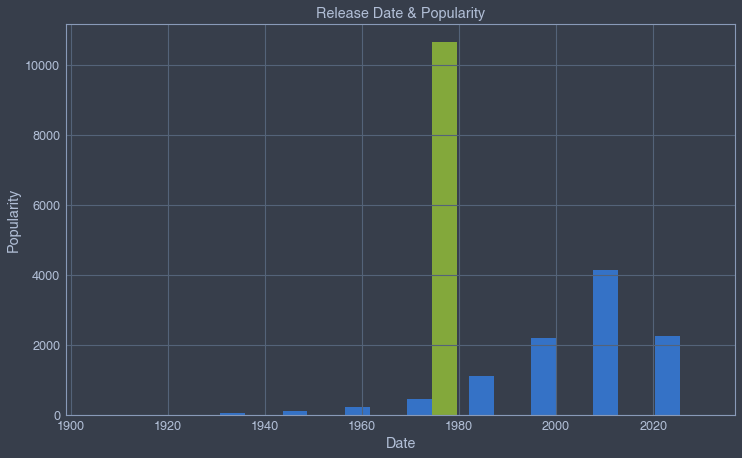

In [16]:
plt.hist(release_n_popularity)
plt.title('Release Date & Popularity')
plt.xlabel('Date')
plt.ylabel('Popularity')

<AxesSubplot:xlabel='popularity', ylabel='title'>

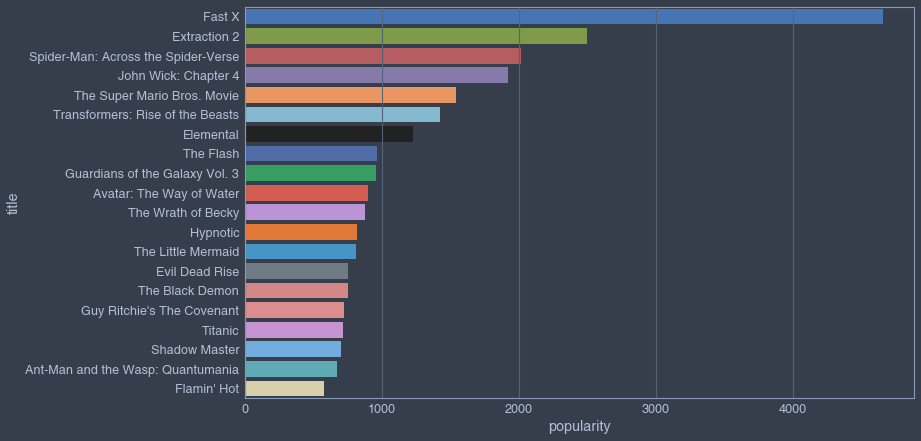

In [9]:
top_popularity = movies_df.sort_values(['popularity'], ascending=False).head(20)
sns.barplot(data=top_popularity, x='popularity', y='title')

<AxesSubplot:xlabel='vote_average', ylabel='title'>

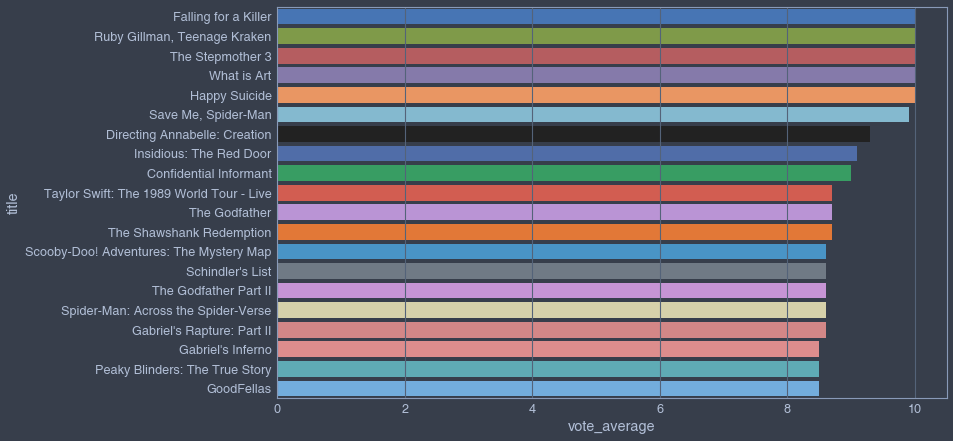

In [26]:
top_vote = movies_df.sort_values(['vote_average'], ascending=False).head(20)
sns.barplot(data=top_vote, x='vote_average', y='title')

<AxesSubplot:>

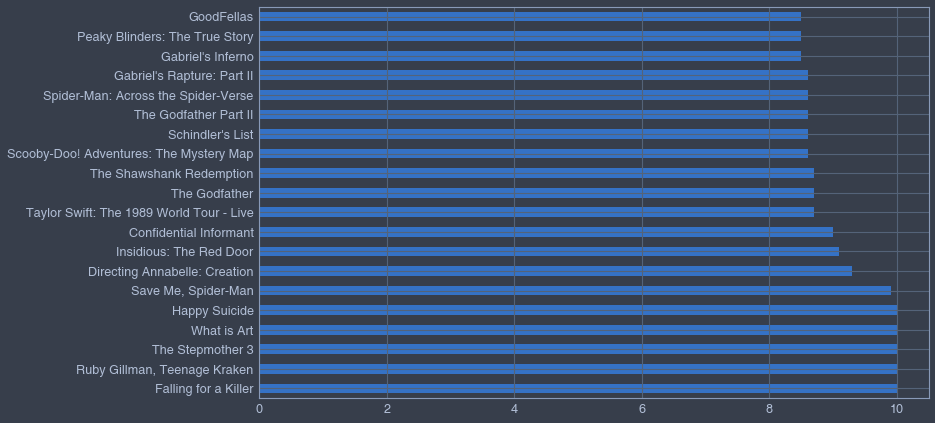

In [40]:
top_vote_2 = pd.Series(top_vote['vote_average'].to_list(), index=top_vote['title'].to_list()) 
top_vote_2.plot(kind='barh')

Text(0, 0.5, 'Vote Average')

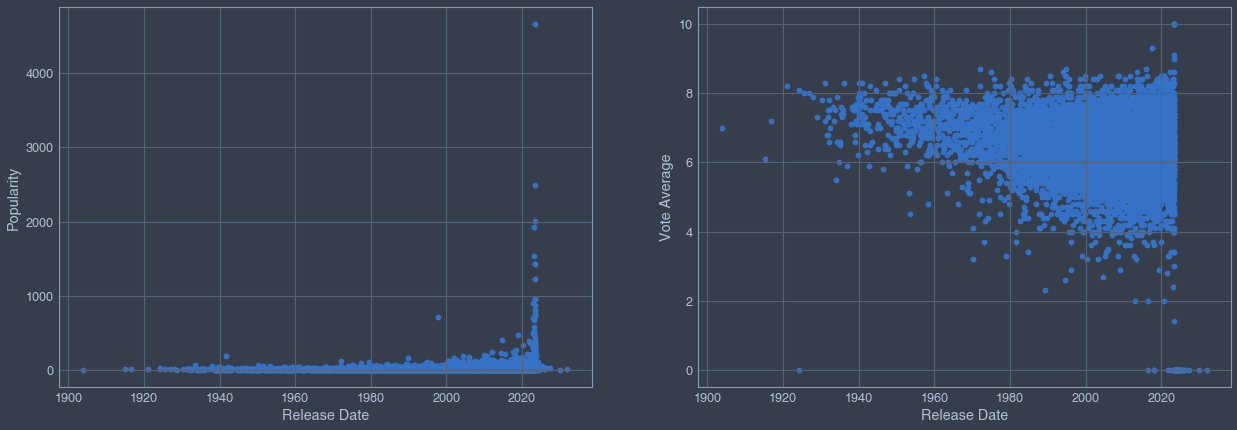

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(21, 7))

axs[0].scatter(movies_df['release_date'], movies_df['popularity'])
axs[0].set_xlabel('Release Date')
axs[0].set_ylabel('Popularity')

axs[1].scatter(movies_df['release_date'], movies_df['vote_average'])
axs[1].set_xlabel('Release Date')
axs[1].set_ylabel('Vote Average')